In [ ]:
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_path = "/content/drive/MyDrive/3rd Year Project/NDWI/Dataset"
data_dir = pathlib.Path(dataset_path)

In [ ]:
batch_size = 32
img_height = 512
img_width = 512

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 947 files belonging to 2 classes.
Using 758 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 947 files belonging to 2 classes.
Using 189 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Lake', 'River']


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation((-0.01, 0.99), fill_mode='nearest', interpolation='bilinear'),
    layers.RandomZoom(height_factor=(0.01, 0.99), width_factor=(0.01, 0.99), fill_mode='nearest', interpolation='bilinear'),
    layers.RandomZoom(height_factor=(-0.01, -0.99), width_factor=(-0.01, -0.99), fill_mode='nearest', interpolation='bilinear'),
  ]
)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                  

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
24/24 [==============================] - 34s 792ms/step - loss: 3.1273 - accuracy: 0.4934 - val_loss: 0.6250 - val_accuracy: 0.6402
Epoch 2/100
24/24 [==============================] - 21s 693ms/step - loss: 0.6500 - accuracy: 0.5501 - val_loss: 0.6011 - val_accuracy: 0.6349
Epoch 3/100
24/24 [==============================] - 21s 719ms/step - loss: 0.6591 - accuracy: 0.5594 - val_loss: 0.6266 - val_accuracy: 0.6561
Epoch 4/100
24/24 [==============================] - 21s 693ms/step - loss: 0.6571 - accuracy: 0.5594 - val_loss: 0.6309 - val_accuracy: 0.6561
Epoch 5/100
24/24 [==============================] - 20s 684ms/step - loss: 0.6706 - accuracy: 0.5594 - val_loss: 0.6332 - val_accuracy: 0.6402
Epoch 6/100
24/24 [==============================] - 21s 690ms/step - loss: 0.6390 - accuracy: 0.5620 - val_loss: 0.6059 - val_accuracy: 0.5820
Epoch 7/100
24/24 [==============================] - 20s 683ms/step - loss: 0.6524 - accuracy: 0.5607 - val_loss: 0.6226 - val_accuracy:

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/NDWI_Rivers_Lakes_Trained_Model.h5")

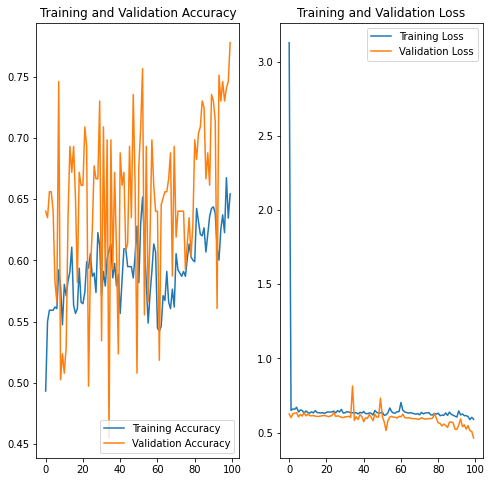

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()